<a href="https://colab.research.google.com/github/VivaceVivo/hh-dcp-intro-to-computer-science/blob/main/content_2022/6.%20Python%20Libraries/6.%20Intro_to_Python_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14 Nov - Python Libraries


![python gif](https://media.giphy.com/media/KAq5w47R9rmTuvWOWa/giphy.gif)

## Pre Requisites

None for today!

---

## Class Curriculum

| Section content                             | Expected time (mins) | Pre - Requirements |
| ------------------------------------------- | -------------------- | ------------------ |
| text   | 5 minutes            | ❌                 |
| Lesson Goals                                | 5 minutes            | ❌                 |

## using libraries

"A library is a collection of materials, books or media that are accessible for use. A library provides physical (hard copies) or digital access (soft copies) materials, and may be a physical location or a virtual space, or both." - *Wikipedia*

Python libraries provide various functions and classes for all kinds of uses. They consist of well tested code that proofed useful in many projects. In the end it's just code that you do not need to write yourself, which you can use to make your life as a programmer a little bit easier.

## some libraries and usage examples

There are quite a lot of Python libraries available and we can show only a few examples that we will use later in this course.

### NumPy

NumPy is an open source project aiming to enable numerical computing with Python. [https://numpy.org](https://numpy.org)

#### working with arrays

NumPy supports a variety of use cases when working with numeric or tabular data, which come most handy in data processing or datascience. You can use the following website as a reference:
[https://numpy.org/devdocs/user/quickstart.html](https://numpy.org/devdocs/user/quickstart.html)



In [59]:
import numpy as np

# create a two dimensional array with some numbers
dim2array = np.array([
    [10, 11, 12, 13, 14, 15],
    [20, 21, 22, 23, 24, 25], 
    [30, 31, 32, 33, 34, 35],
    [40, 41, 42, 43, 44, 45]
])

# to see the size of the array dimensions (4 rows with 6 elements each in this case)
print(dim2array.shape)

# element wise operations
print("add '3' to each element: {}".format(
    (dim2array[0]+3))
)

# you can transform the shape of arrays by providing the new dimensions
dim1array = dim2array.reshape(24)
print("one dimensional: {}".format(dim1array))
print("add all elements: {}".format(dim1array.sum()))


(4, 6)
add '3' to each element: [13 14 15 16 17 18]
one dimensional: [10 11 12 13 14 15 20 21 22 23 24 25 30 31 32 33 34 35 40 41 42 43 44 45]
add all elements: 660


#### loading and storing data to files

In real life situations you will not be able to write every data into your source code file. NumPy hase some convenience functions to load and store array data as text files. [https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html)

when reading Data from File, you need to specify a format:

    c : character
    d or i : signed decimal integer
    f : decimal floating point
    s : string of characters
    u : unsigned decimal integer

In [60]:
import numpy as np
from io import StringIO

names = np.array([['Python',29.48],['Java',17.18],['JavaScript',9.14],['C#',6.94],['PHP',6.49],['C/C++',6.49],['R',3.59],['TypeScript',2.18],['Swift',2.1],['Objective-C',2.06]])
np.savetxt('programming-languages.txt', names, delimiter=';', fmt=("%s"))

# load data from CSV file:  
f = open('programming-languages.txt','r')

# alternatively you could provide Data as String
#f = StringIO("Python;29.48\nJava;17.18\nJavaScript;9.14\nC#;6.94\nPHP;6.49\nC/C++;6.49\nR;3.59\nTypeScript;2.18\nSwift;2.1\nObjective-C;2.06")

language, percentage =  np.loadtxt(f, dtype={'names': ('language', 'percentage'), 'formats': ('U15', 'f4')}, delimiter=';', comments='§', unpack=True)
print(language)

['Python' 'Java' 'JavaScript' 'C#' 'PHP' 'C/C++' 'R' 'TypeScript' 'Swift'
 'Objective-C']


### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [https://matplotlib.org/](https://matplotlib.org/)

Matplot supports a number of visualizations for common data structures out of the box, for example:

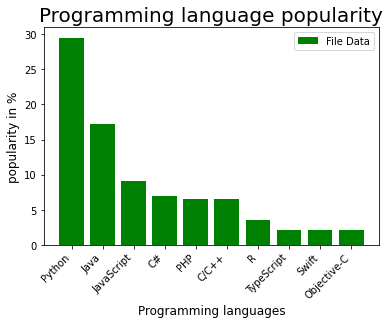

In [61]:
import matplotlib.pyplot as plt

# drawing a bar diagram
plt.bar(language, percentage, color = 'g', label = 'File Data')
  
plt.xlabel('Programming languages', fontsize = 12)
plt.ylabel('popularity in %', fontsize = 12)

  
plt.title('Programming language popularity', fontsize = 20)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

displaying pie chart of ['Python' 'Java' 'JavaScript' 'C#' 'PHP']


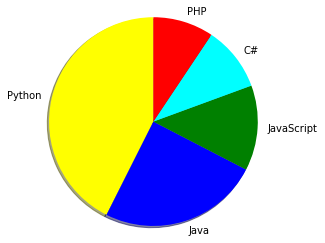

In [62]:
colors = ['yellow', 'b', 'green', 'cyan','red'] 
top5Percent = np.split(percentage,2)[0]
top5language = np.split(language,2)[0]
print("displaying pie chart of {}".format(top5language))

# plotting pie chart 
plt.pie(top5Percent, labels = top5language, colors = colors, startangle = 90,
        shadow = True, radius = 1.2) 
plt.show()

### pandas

pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. [https://pandas.pydata.org/](https://pandas.pydata.org/)

#### loading and storing CSV data from/to files

In [65]:
import pandas as pd

import matplotlib.pyplot as plt

programmingLanguages = pd.read_csv("programming-languages.txt", sep=';', header=None)
programmingLanguages.head(5).to_csv("programming-languages.csv", header=["language","percent"])

Pandas is a rather large library with many features, so we will take a look at a data visualization show case to get a grasp of Pandas capabilities.
Let's take for example some RKI Data with corona cases per 'Bundesland' from https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Inzidenz-Tabellen.html?nn=13490888
You find the data in the 'fallzahlen.txt' file.

In [106]:
# to parse some data with non standard formatting: (we use transpose to change rows with columns)
fallzahlen = pd.read_csv("fallzahlen.txt", sep='\t', parse_dates=[0], index_col=0).transpose()

# Pandas will try to guess the data type of the columns
# fallzahlen = fallzahlen.apply(pd.to_numeric, errors='ignore')

# to display the first 5 rows of our data:
fallzahlen.head(5)

bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Gesamt
06.05.20,908,1318,276,125,119,95,447,23,361,1465,208,94,149,54,140,198,5980
07.05.20,779,1246,265,116,126,85,420,23,350,1498,176,87,162,50,142,180,5705
08.05.20,665,1182,272,117,140,86,424,22,351,1379,157,64,155,52,149,179,5394
09.05.20,706,1223,280,131,155,89,415,22,430,1448,159,55,170,60,174,186,5703
10.05.20,772,1148,269,118,170,80,456,24,417,1449,149,52,163,58,202,188,5715


In [107]:
# display details of the DataFrame
fallzahlen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 06.05.20 to 10.09.21
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Baden-Württemberg       493 non-null    int64
 1   Bayern                  493 non-null    int64
 2   Berlin                  493 non-null    int64
 3   Brandenburg             493 non-null    int64
 4   Bremen                  493 non-null    int64
 5   Hamburg                 493 non-null    int64
 6   Hessen                  493 non-null    int64
 7   Mecklenburg-Vorpommern  493 non-null    int64
 8   Niedersachsen           493 non-null    int64
 9   Nordrhein-Westfalen     493 non-null    int64
 10  Rheinland-Pfalz         493 non-null    int64
 11  Saarland                493 non-null    int64
 12  Sachsen                 493 non-null    int64
 13  Sachsen-Anhalt          493 non-null    int64
 14  Schleswig-Holstein      493 non-null    int64
 15  Thüringen       

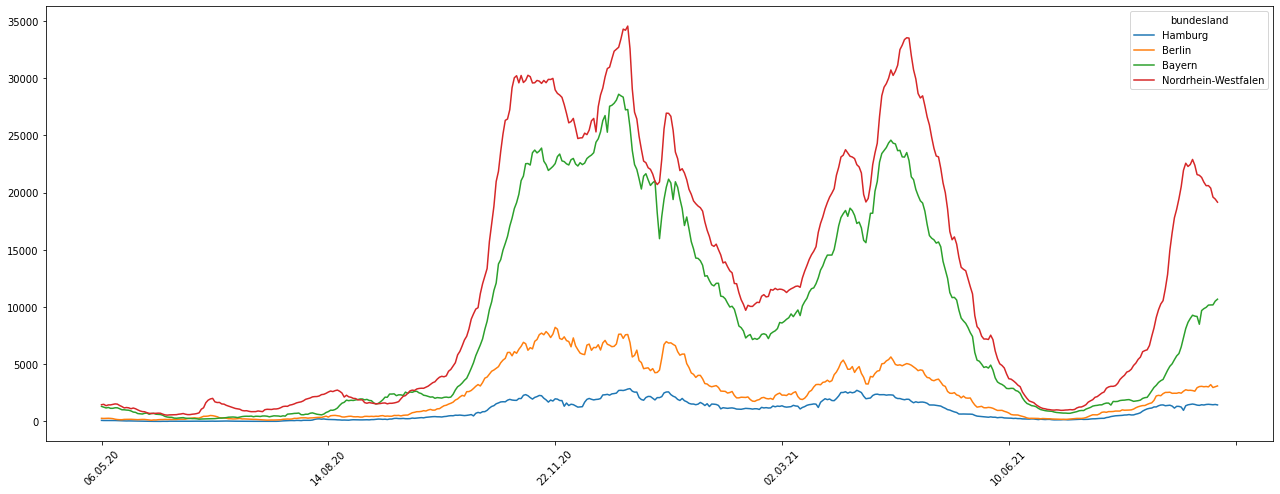

In [108]:
# plot as a line diagram
fallzahlen[["Hamburg","Berlin","Bayern","Nordrhein-Westfalen"]].plot(rot=45, figsize=(22, 8))

To be able to compare the numbers, we will calculate the number of infections per 100.000 citizens. e.g. 

Bayern: 1318 cases

Bayern: 13140183 citizens

      1318 / (13140183/100000) = 10.03030170888792

Next we need the number of citizens per Bundesland from Wikipedia https://de.wikipedia.org/wiki/Liste_der_deutschen_Bundesl%C3%A4nder_nach_Bev%C3%B6lkerung
which are stored in the file "Bundesland_Einwohner_2020":

In [109]:
# load the file into the DataFrame 'einwohner'
einwohner = pd.read_csv("Bundesland_Einwohner_2020", sep=';', index_col=0).transpose()
# we can access the numbers like this:
einwohner["Bayern"][0]

13140183

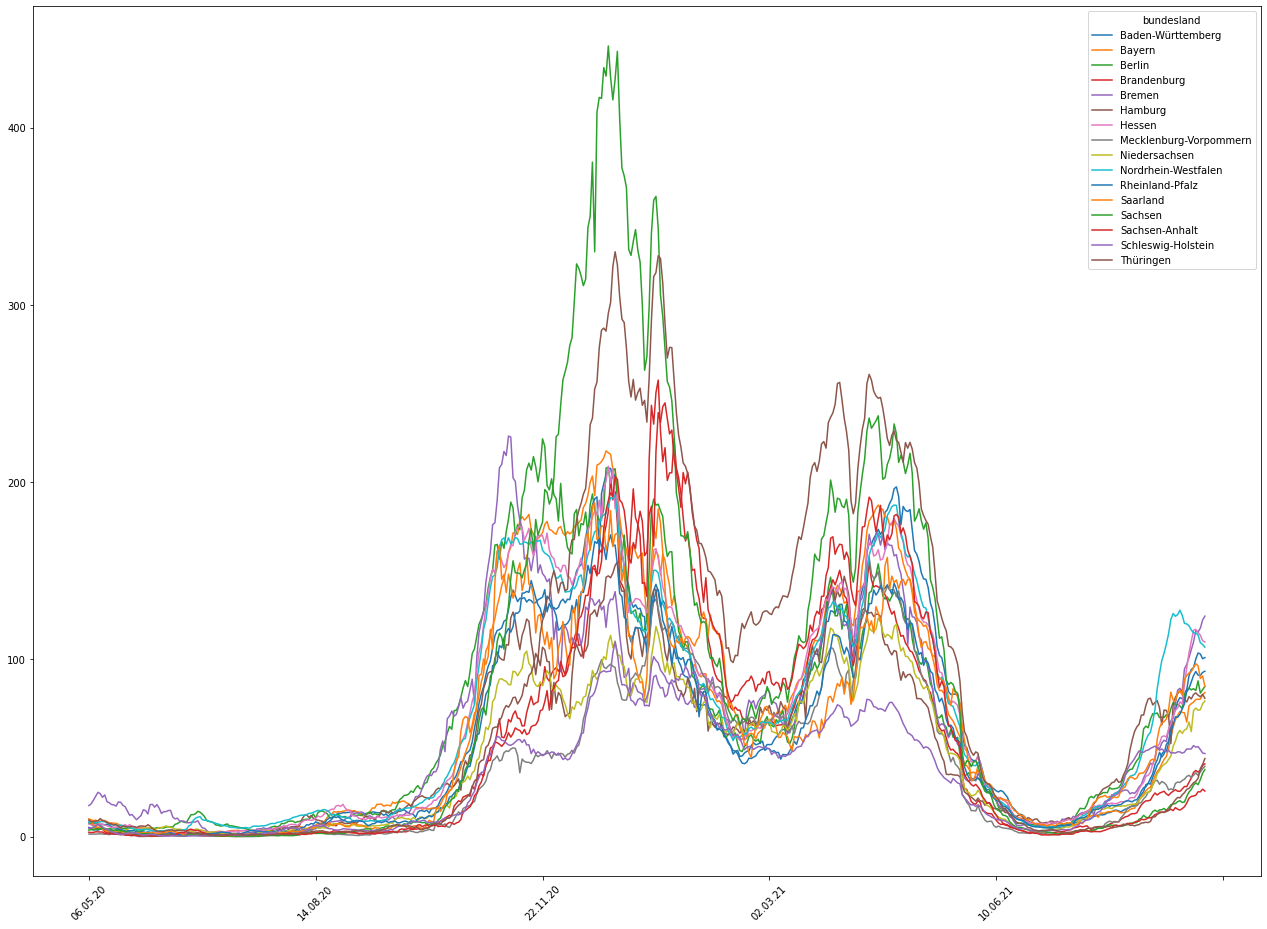

In [136]:
# we copy the dataframe because we change the contents below
normalized = fallzahlen.copy()

# now we add new Columns to the DataFrame with the numbers from the formula
for title in einwohner.columns:
  normalized[title]=normalized[title]/(einwohner[title][0]/100000)

# now we plot all columns except "Gesamt" 
normalized.drop(['Gesamt'], axis=1).plot(rot=45, figsize=(22, 16))


### seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [https://seaborn.pydata.org/](https://seaborn.pydata.org/)